<a href="https://colab.research.google.com/github/2303A52352/STML-LAB/blob/main/STML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import zipfile

# Load the dataset
# Using zipfile to extract the specific CSV file from the ZIP archive
with zipfile.ZipFile('/content/CLASSIFICATION DATA SET.zip') as z:
    with z.open('train.csv') as f:  # Assuming 'train.csv' is the file you want to load
        data = pd.read_csv(f)

# Split dataset into features and target variable
X = data.drop(columns=['price_range'])
y = data['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model
svm = SVC(random_state=42)

# Train the SVM model on the training data
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Generate classification report
class_report_svm = classification_report(y_test, y_pred_svm, target_names=[str(i) for i in range(4)])

# Display results
print("Confusion Matrix:\n", conf_matrix_svm)
print("\nClassification Report:\n", class_report_svm)

Confusion Matrix:
 [[135  16   0   0]
 [ 14 123   9   0]
 [  0  19 122   7]
 [  0   0  13 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.85      0.82      0.84       148
           3       0.95      0.92      0.93       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



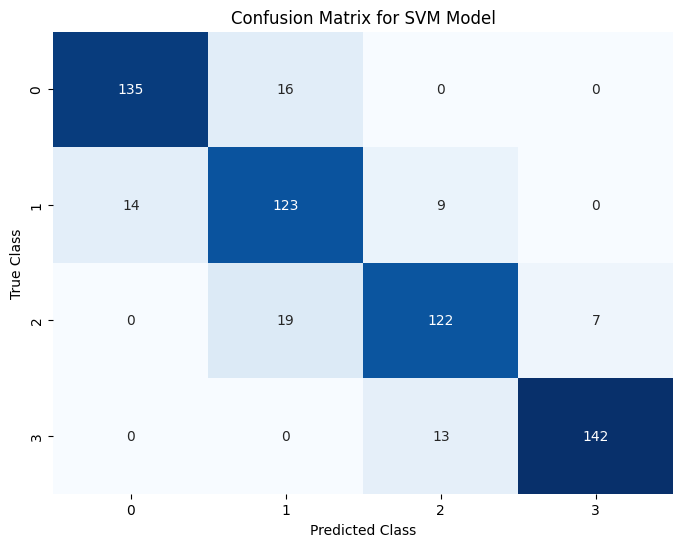


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.85      0.82      0.84       148
           3       0.95      0.92      0.93       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Print the classification report for reference
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=[str(i) for i in range(4)]))


Confusion Matrix:
 [[135  16   0   0]
 [ 22  93  31   0]
 [  0  17 111  20]
 [  0   0  30 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       151
           1       0.74      0.64      0.68       146
           2       0.65      0.75      0.69       148
           3       0.86      0.81      0.83       155

    accuracy                           0.77       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600



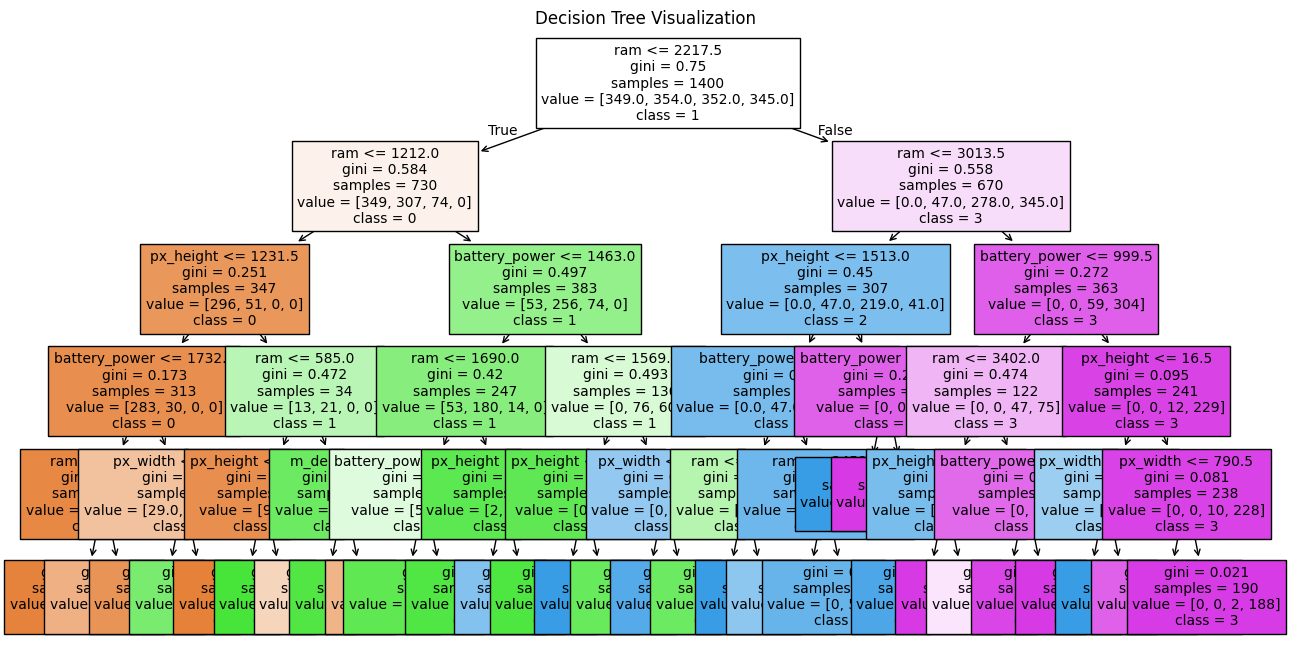

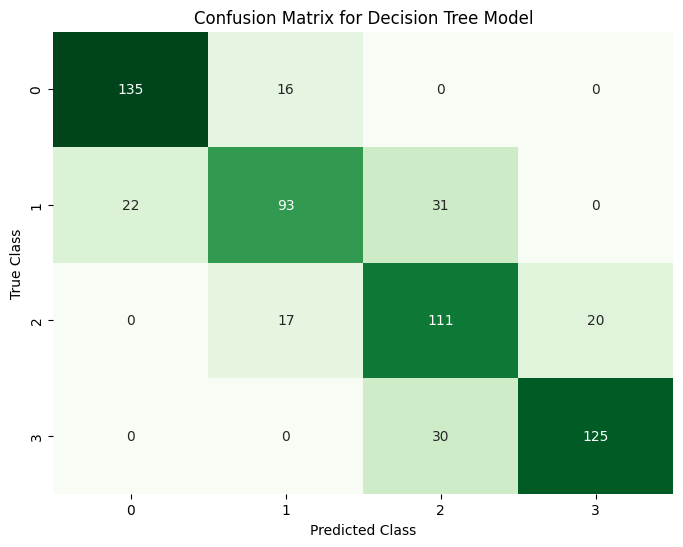

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Load the dataset
# Using zipfile to extract the specific CSV file from the ZIP archive
with zipfile.ZipFile('/content/CLASSIFICATION DATA SET.zip') as z:
    with z.open('train.csv') as f:  # Assuming 'train.csv' is the file you want to load
        data = pd.read_csv(f)
# Split dataset into features and target variable
X = data.drop(columns=['price_range'])
y = data['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42, max_depth=5)  # max_depth is set to avoid overfitting
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, target_names=[str(i) for i in range(4)])

# Print results
print("Confusion Matrix:\n", conf_matrix_dt)
print("\nClassification Report:\n", class_report_dt)

# Plot the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=[str(i) for i in range(4)], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Confusion Matrix:
 [[141  10   0   0]
 [  9 123  14   0]
 [  0  20 114  14]
 [  0   0  19 136]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       151
           1       0.80      0.84      0.82       146
           2       0.78      0.77      0.77       148
           3       0.91      0.88      0.89       155

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



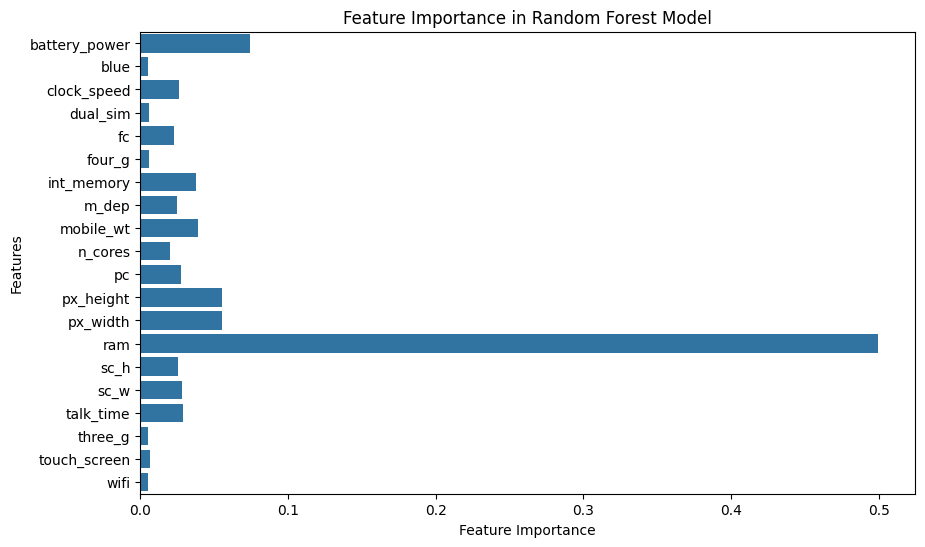

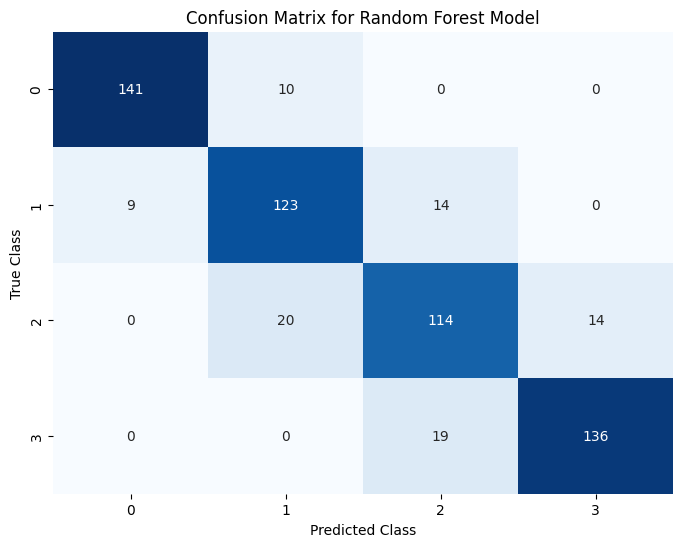

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Load the dataset
# Using zipfile to extract the specific CSV file from the ZIP archive
with zipfile.ZipFile('/content/CLASSIFICATION DATA SET.zip') as z:
    with z.open('train.csv') as f:  # Assuming 'train.csv' is the file you want to load
        data = pd.read_csv(f)

# Split dataset into features and target variable
X = data.drop(columns=['price_range'])
y = data['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)  # n_estimators is the number of trees
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf, target_names=[str(i) for i in range(4)])

# Print results
print("Confusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = rf.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Confusion Matrix:
 [[110  35   6   0]
 [ 44  68  30   4]
 [  9  58  59  22]
 [  4  18  62  71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69       151
           1       0.38      0.47      0.42       146
           2       0.38      0.40      0.39       148
           3       0.73      0.46      0.56       155

    accuracy                           0.51       600
   macro avg       0.54      0.51      0.52       600
weighted avg       0.54      0.51      0.52       600



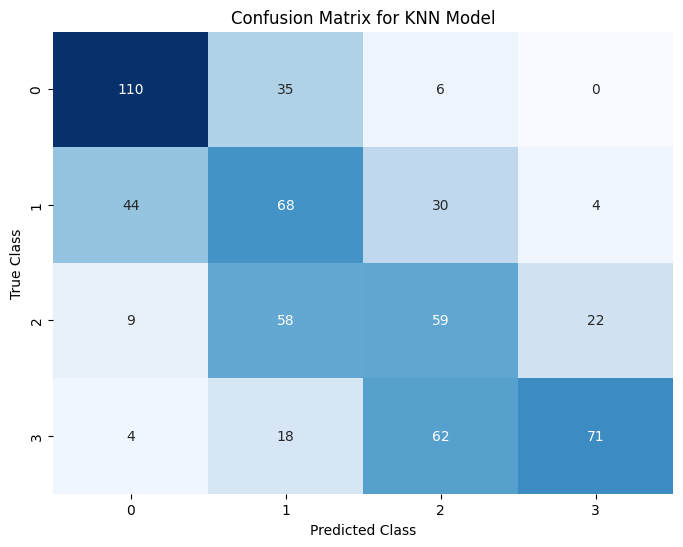

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Load the dataset
# Using zipfile to extract the specific CSV file from the ZIP archive
with zipfile.ZipFile('/content/CLASSIFICATION DATA SET.zip') as z:
    with z.open('train.csv') as f:  # Assuming 'train.csv' is the file you want to load
        data = pd.read_csv(f)  # Read the CSV file from the extracted file object

# Split dataset into features and target variable
X = data.drop(columns=['price_range'])
y = data['price_range']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Set k (number of neighbors)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn, target_names=[str(i) for i in range(4)])

# Print results
print("Confusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", class_report_knn)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()